In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ml-latest-small/ratings.csv")

(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

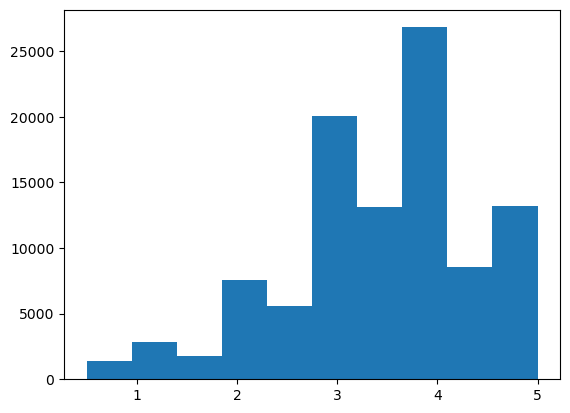

In [5]:
import matplotlib.pyplot as plt 

plt.hist(df['rating'])

(array([8.946e+03, 4.990e+02, 1.410e+02, 7.200e+01, 2.800e+01, 1.800e+01,
        1.200e+01, 3.000e+00, 2.000e+00, 3.000e+00]),
 array([  1. ,  33.8,  66.6,  99.4, 132.2, 165. , 197.8, 230.6, 263.4,
        296.2, 329. ]),
 <BarContainer object of 10 artists>)

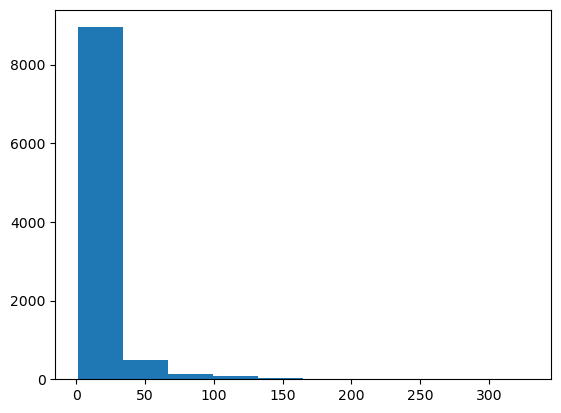

In [13]:
plt.hist(df.groupby(['movieId'])['movieId'].count())

In [7]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [52]:
import numpy as np
# Matriz de valoraciones
n_users = df['userId'].unique().shape[0]

ratings = np.zeros((n_users, 193609))
print("N° Users: ", n_users)
print("N° Items: ", n_items)

N° Users:  610
N° Items:  9724


In [53]:
for row in df.itertuples():
    ratings[row.userId-1, row.movieId-1] = row.rating

In [60]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= ratings.shape[0] * ratings.shape[1]
sparsity *= 100

print(f"Coeficiente de sparseidad: {sparsity:.2f}%")

Coeficiente de sparseidad: 0.09%


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
ratings_train, ratings_test = train_test_split(ratings, test_size=.3, random_state=42)

In [65]:
# Matriz de similaridad entre los usuarios
import sklearn

sim_matrix = 1- sklearn.metrics.pairwise.cosine_distances(ratings_train)

In [67]:
user_predictions = sim_matrix.dot(ratings_train) / np.array([np.abs(sim_matrix).sum(axis=1)]).T

In [69]:
from sklearn.metrics import mean_squared_error

def get_mae(preds, actuals):
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)

In [70]:
get_mae(user_predictions, ratings_test)

10.552440281951363

In [80]:
# Filtro colaborativo basado en knn
from sklearn.neighbors import NearestNeighbors

k = 10
neighbors = NearestNeighbors(n_neighbors=k, metric='cosine')
neighbors.fit(ratings_train)
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance=True)

top_k_distances.shape

(427, 10)

In [84]:
users_predict_k = np.zeros(ratings.shape)

for i in range(ratings_train.shape[0]):
    users_predict_k[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i]) / np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

MemoryError: Unable to allocate 6.16 GiB for an array with shape (427, 10, 193609) and data type float64